In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [11]:
data=pd.read_csv('homeprice_onehot.csv')

In [12]:
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


In [13]:
#  creating dummies
dummies= pd.get_dummies(data.town)
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [14]:
new_data= pd.concat([data, dummies], axis=1)
new_data

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,61000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


### another method for one hot encoding
#### 05-06-23

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
enc=OneHotEncoder()

In [15]:
enc.fit_transform(new_data[['town']])

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [16]:
enc.fit_transform(new_data[['town']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [34]:
enc_data=pd.DataFrame(enc.fit_transform(new_data[['town']]).toarray(), columns=['monroe township','robbinsville','west windsor'])
enc_data

,monroe township,robbinsville,west windsor
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [35]:
one_hot_data= data.join(enc_data)
one_hot_data


,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1.0,0.0,0.0
1,monroe township,3000,565000,1.0,0.0,0.0
2,monroe township,3200,61000,1.0,0.0,0.0
3,monroe township,3600,680000,1.0,0.0,0.0
4,monroe township,4000,725000,1.0,0.0,0.0
5,west windsor,2600,585000,0.0,0.0,1.0
6,west windsor,2800,615000,0.0,0.0,1.0
7,west windsor,3300,650000,0.0,0.0,1.0
8,west windsor,3600,710000,0.0,0.0,1.0
9,robbinsville,2600,575000,0.0,1.0,0.0


In [36]:
one_hot_data= one_hot_data.drop("town", axis=1)  #droping town coloumn
one_hot_data

,area,price,monroe township,robbinsville,west windsor
0,2600,550000,1.0,0.0,0.0
1,3000,565000,1.0,0.0,0.0
2,3200,61000,1.0,0.0,0.0
3,3600,680000,1.0,0.0,0.0
4,4000,725000,1.0,0.0,0.0
5,2600,585000,0.0,0.0,1.0
6,2800,615000,0.0,0.0,1.0
7,3300,650000,0.0,0.0,1.0
8,3600,710000,0.0,0.0,1.0
9,2600,575000,0.0,1.0,0.0


In [37]:
x=one_hot_data.drop('price',axis=1)
y=one_hot_data['price']


In [41]:
x

,area,monroe township,robbinsville,west windsor
0,2600,1.0,0.0,0.0
1,3000,1.0,0.0,0.0
2,3200,1.0,0.0,0.0
3,3600,1.0,0.0,0.0
4,4000,1.0,0.0,0.0
5,2600,0.0,0.0,1.0
6,2800,0.0,0.0,1.0
7,3300,0.0,0.0,1.0
8,3600,0.0,0.0,1.0
9,2600,0.0,1.0,0.0


In [42]:
y

0     550000
1     565000
2      61000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [39]:
model=LinearRegression()

In [40]:
model.fit(x,y)

LinearRegression()

In [43]:
y_pred=model.predict(x)

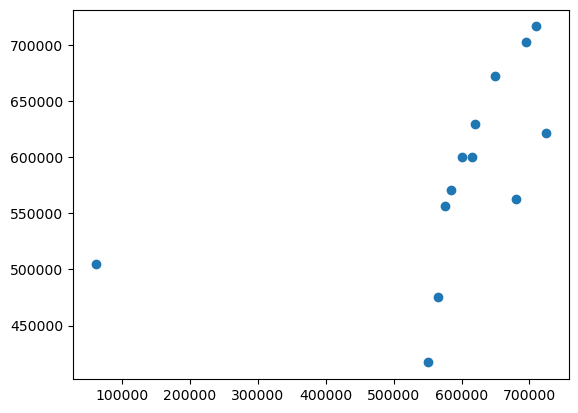

In [45]:
plt.scatter(y,y_pred)

In [44]:
pd.DataFrame(({'true y values': y,'dezired y values': y_pred}))

,true y values,dezired y values
0,550000,417067.082348
1,565000,475380.563320
2,61000,504537.303806
3,680000,562850.784777
4,725000,621164.265749
5,585000,570752.741346
6,615000,599909.481832
7,650000,672801.333047
8,710000,716536.443775
9,575000,556897.333907


In [46]:
model.predict([[4000,1,0,0]])

C:\Program Files\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([621164.2657492])

In [ ]:
from.sk